In [1]:
# Install and Import
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNetV2, EfficientNetB0, ResNet50
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
# Data Preparation
train_dir = 'Images'

datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.3
)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

test_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Found 14458 images belonging to 120 classes.
Found 6122 images belonging to 120 classes.


## Baseline Model

In [4]:
# Define Baseline CNN
baseline_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(train_generator.num_classes, activation='softmax')
])
baseline_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# Training all models
history_baseline = baseline_model.fit(train_generator, epochs=10, validation_data=test_generator)

Epoch 1/10


/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


452/452 ━━━━━━━━━━━━━━━━━━━━ 150s 332ms/step - accuracy: 0.0105 - loss: 5.1244 - val_accuracy: 0.0178 - val_loss: 4.6647
Epoch 2/10
452/452 ━━━━━━━━━━━━━━━━━━━━ 150s 332ms/step - accuracy: 0.0212 - loss: 4.6214 - val_accuracy: 0.0284 - val_loss: 4.5617
Epoch 3/10
452/452 ━━━━━━━━━━━━━━━━━━━━ 733s 2s/step - accuracy: 0.0295 - loss: 4.4928 - val_accuracy: 0.0361 - val_loss: 4.4488
Epoch 4/10
452/452 ━━━━━━━━━━━━━━━━━━━━ 151s 333ms/step - accuracy: 0.0603 - loss: 4.1716 - val_accuracy: 0.0462 - val_loss: 4.4114
Epoch 5/10
452/452 ━━━━━━━━━━━━━━━━━━━━ 149s 329ms/step - accuracy: 0.1567 - loss: 3.5076 - val_accuracy: 0.0434 - val_loss: 4.7407
Epoch 6/10
452/452 ━━━━━━━━━━━━━━━━━━━━ 150s 331ms/step - accuracy: 0.3528 - loss: 2.4923 - val_accuracy: 0.0400 - val_loss: 5.6370
Epoch 7/10
452/452 ━━━━━━━━━━━━━━━━━━━━ 150s 332ms/step - accuracy: 0.5692 - loss: 1.5823 - val_accuracy: 0.0376 - val_loss: 7.8709
Epoch 8/10
452/452 ━━━━━━━━━━━━━━━━━━━━ 150s 331ms/step - accuracy: 0.7232 - loss: 1.0338 

## Proposed Model 1

In [7]:
# Define MobileNetV2
base_mobilenet = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3))
base_mobilenet.trainable = False
x = GlobalAveragePooling2D()(base_mobilenet.output)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
output = Dense(train_generator.num_classes, activation='softmax')(x)
mobilenet_model = Model(inputs=base_mobilenet.input, outputs=output)
mobilenet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
history_mobilenet = mobilenet_model.fit(train_generator, epochs=10, validation_data=test_generator)

Epoch 1/10
452/452 ━━━━━━━━━━━━━━━━━━━━ 123s 269ms/step - accuracy: 0.4132 - loss: 2.6201 - val_accuracy: 0.7612 - val_loss: 0.7545
Epoch 2/10
452/452 ━━━━━━━━━━━━━━━━━━━━ 121s 269ms/step - accuracy: 0.7900 - loss: 0.6746 - val_accuracy: 0.7788 - val_loss: 0.7063
Epoch 3/10
452/452 ━━━━━━━━━━━━━━━━━━━━ 122s 269ms/step - accuracy: 0.8335 - loss: 0.5287 - val_accuracy: 0.7886 - val_loss: 0.6770
Epoch 4/10
452/452 ━━━━━━━━━━━━━━━━━━━━ 424s 940ms/step - accuracy: 0.8591 - loss: 0.4242 - val_accuracy: 0.7898 - val_loss: 0.6906
Epoch 5/10
452/452 ━━━━━━━━━━━━━━━━━━━━ 134s 296ms/step - accuracy: 0.8849 - loss: 0.3581 - val_accuracy: 0.7927 - val_loss: 0.6989
Epoch 6/10
452/452 ━━━━━━━━━━━━━━━━━━━━ 124s 275ms/step - accuracy: 0.8877 - loss: 0.3225 - val_accuracy: 0.7976 - val_loss: 0.6917
Epoch 7/10
452/452 ━━━━━━━━━━━━━━━━━━━━ 123s 272ms/step - accuracy: 0.9008 - loss: 0.2899 - val_accuracy: 0.7844 - val_loss: 0.7460
Epoch 8/10
452/452 ━━━━━━━━━━━━━━━━━━━━ 121s 268ms/step - accuracy: 0.9127 -

## Proposed Model 2

In [26]:
# Data Preparation
train_dir = 'Images'

datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.3
)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

test_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Found 14458 images belonging to 120 classes.
Found 6122 images belonging to 120 classes.


In [32]:
# Define ResNet50
base_resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))
base_resnet.trainable = False
x = GlobalAveragePooling2D()(base_resnet.output)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
output = Dense(train_generator.num_classes, activation='softmax')(x)
resnet_model = Model(inputs=base_resnet.input, outputs=output)
resnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [34]:
history_resnet = resnet_model.fit(train_generator, epochs=10, validation_data=test_generator)

Epoch 1/10
452/452 ━━━━━━━━━━━━━━━━━━━━ 437s 963ms/step - accuracy: 0.0096 - loss: 4.8249 - val_accuracy: 0.0199 - val_loss: 4.7248
Epoch 2/10
452/452 ━━━━━━━━━━━━━━━━━━━━ 431s 954ms/step - accuracy: 0.0216 - loss: 4.7047 - val_accuracy: 0.0253 - val_loss: 4.6443
Epoch 3/10
452/452 ━━━━━━━━━━━━━━━━━━━━ 432s 956ms/step - accuracy: 0.0254 - loss: 4.6155 - val_accuracy: 0.0278 - val_loss: 4.5864
Epoch 4/10
452/452 ━━━━━━━━━━━━━━━━━━━━ 849s 2s/step - accuracy: 0.0288 - loss: 4.5790 - val_accuracy: 0.0358 - val_loss: 4.5449
Epoch 5/10
452/452 ━━━━━━━━━━━━━━━━━━━━ 767s 2s/step - accuracy: 0.0388 - loss: 4.5255 - val_accuracy: 0.0403 - val_loss: 4.5194
Epoch 6/10
452/452 ━━━━━━━━━━━━━━━━━━━━ 436s 966ms/step - accuracy: 0.0361 - loss: 4.5058 - val_accuracy: 0.0385 - val_loss: 4.5086
Epoch 7/10
452/452 ━━━━━━━━━━━━━━━━━━━━ 442s 979ms/step - accuracy: 0.0405 - loss: 4.4689 - val_accuracy: 0.0417 - val_loss: 4.4959
Epoch 8/10
452/452 ━━━━━━━━━━━━━━━━━━━━ 439s 971ms/step - accuracy: 0.0431 - loss:

In [38]:
# Evaluation
baseline_loss, baseline_acc = baseline_model.evaluate(test_generator)
mobilenet_loss, mobilenet_acc = mobilenet_model.evaluate(test_generator)
resnet_loss, resnet_acc = resnet_model.evaluate(test_generator)

print(f"Baseline Model - Test Accuracy: {baseline_acc:.4f}, Test Loss: {baseline_loss:.4f}")
print(f"MobileNetV2 Model - Test Accuracy: {mobilenet_acc:.4f}, Test Loss: {mobilenet_loss:.4f}")
print(f"ResNet50 Model - Test Accuracy: {resnet_acc:.4f}, Test Loss: {resnet_loss:.4f}")

192/192 ━━━━━━━━━━━━━━━━━━━━ 16s 81ms/step - accuracy: 0.0386 - loss: 11.9551
192/192 ━━━━━━━━━━━━━━━━━━━━ 33s 170ms/step - accuracy: 0.7720 - loss: 0.8428
192/192 ━━━━━━━━━━━━━━━━━━━━ 678s 4s/step - accuracy: 0.0665 - loss: 4.4087
Baseline Model - Test Accuracy: 0.0354, Test Loss: 12.1833
MobileNetV2 Model - Test Accuracy: 0.7798, Test Loss: 0.8136
ResNet50 Model - Test Accuracy: 0.0518, Test Loss: 4.4480


In [40]:
# Plotting Function
def plot_history(history, title):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(acc))
    
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Train Acc')
    plt.plot(epochs_range, val_acc, label='Val Acc')
    plt.title(f'{title} - Accuracy')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Train Loss')
    plt.plot(epochs_range, val_loss, label='Val Loss')
    plt.title(f'{title} - Loss')
    plt.legend()
    
    plt.show()

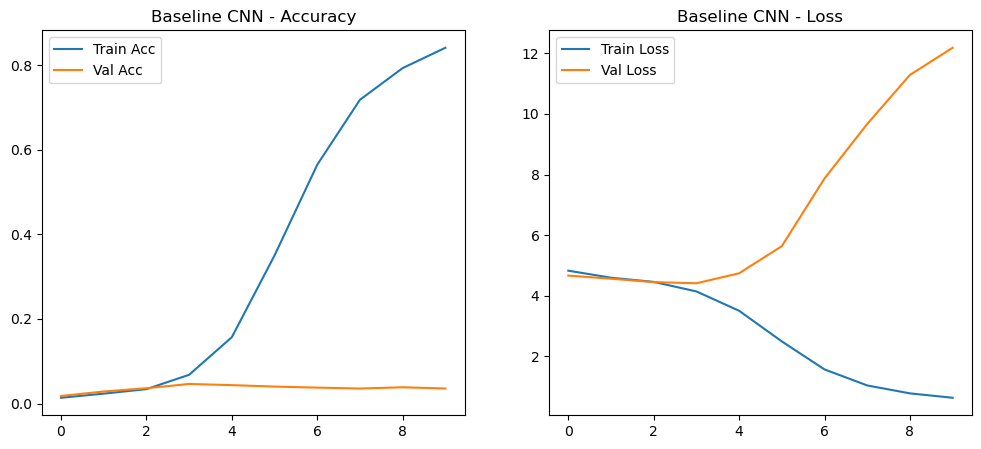

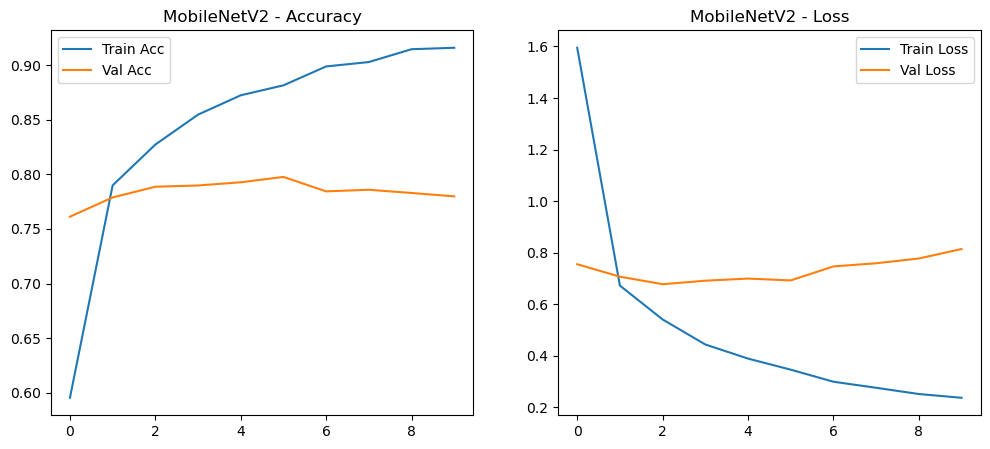

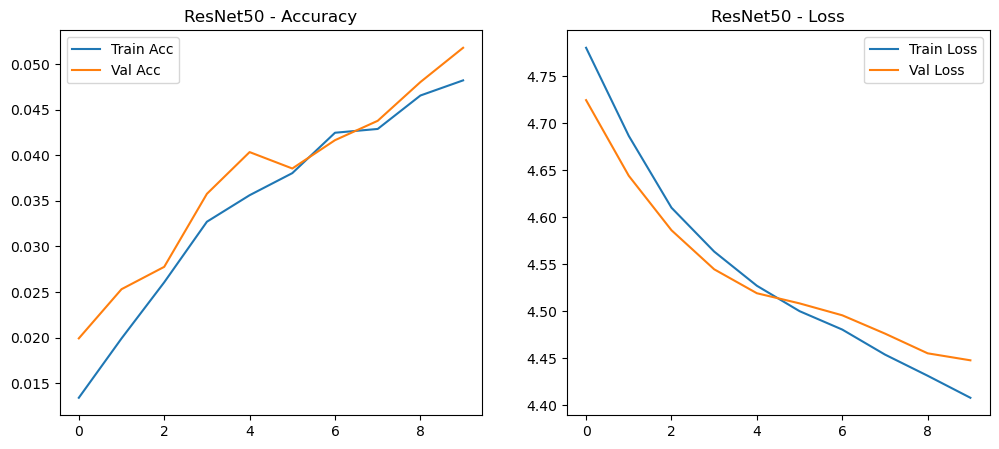

In [42]:
# Plotting all
plot_history(history_baseline, "Baseline CNN")
plot_history(history_mobilenet, "MobileNetV2")
plot_history(history_resnet, "ResNet50")

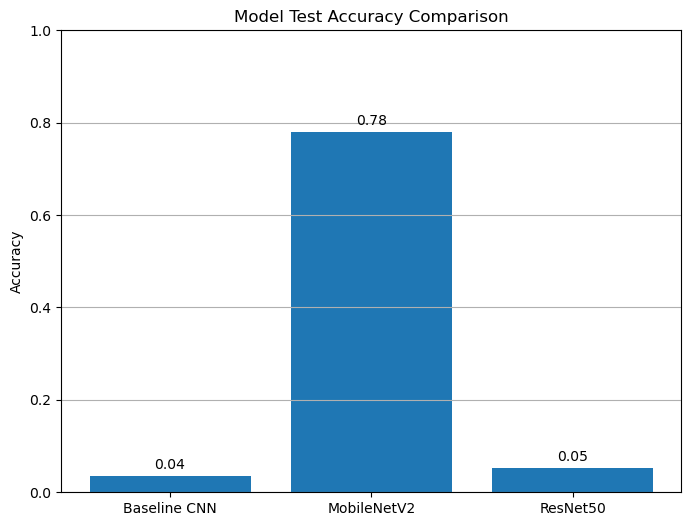

In [44]:
# Accuracy Comparison
models = ['Baseline CNN', 'MobileNetV2', 'ResNet50']
accuracies = [baseline_acc, mobilenet_acc, resnet_acc]

plt.figure(figsize=(8,6))
bars = plt.bar(models, accuracies)
plt.ylim(0,1)
plt.title('Model Test Accuracy Comparison')
plt.ylabel('Accuracy')
plt.grid(axis='y')

for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

plt.show()